In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import Flatten

In [2]:
#Read file from local
AAPL = pd.read_csv("AAPL.csv")
AMD = pd.read_csv("AMD.csv")

#Change Date into datetime
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
AMD['Date'] = pd.to_datetime(AMD['Date'])

#Set the index of the dataset using Date
AAPL=AAPL.set_index('Date')
AMD=AMD.set_index('Date')


In [3]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [4]:
AMD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


# Case A

### Drop Unneccesary Column

In [5]:
#Cukup sisakan hanya Close
AAPL = AAPL.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
AMD = AMD.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [6]:
AAPL.head()

,Close
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


## Reshape and Normalize DataFrame

In [7]:
mm = MinMaxScaler(feature_range=(0,1))

AAPL_scaled = mm.fit_transform(np.array(AAPL).reshape(-1,1))
AMD_scaled = mm.fit_transform(np.array(AMD).reshape(-1,1))

In [8]:
AAPL_scaled

array([[9.69299159e-04],
       [8.87386505e-04],
       [7.78169755e-04],
       ...,
       [7.78626234e-01],
       [7.77036025e-01],
       [7.36119074e-01]])

## Separate Input and Output with winsize = 5 & horizon = 5

In [9]:
#Function untuk separate data
def create_windows(data, window_size, horizon):
    windows = []
    targets = []
    for i in range(len(data) - window_size - horizon + 1):
        windows.append(data[i:i+window_size])
        targets.append(data[i+window_size:i+window_size+horizon])
    return np.array(windows),np.array(targets)

def window_preview(windows, target, ranges):
  for i in range(ranges):
    print(f"\nWindow: \n{windows[i]} \n-> Horizon:\n {target[i]}")

In [10]:
#Separate data menjadi input dan output
winsize = 5
horizon = 5

AAPL_x,AAPL_y = create_windows(AAPL_scaled,winsize,horizon)
AMD_x,AMD_y = create_windows(AMD_scaled,winsize,horizon)

In [11]:
window_preview(AAPL_x,AAPL_y,2)


Window: 
[[0.0009693 ]
 [0.00088739]
 [0.00077817]
 [0.0008123 ]
 [0.00085326]] 
-> Horizon:
 [[0.00094199]
 [0.00101708]
 [0.00108534]
 [0.00117408]
 [0.00133791]]

Window: 
[[0.00088739]
 [0.00077817]
 [0.0008123 ]
 [0.00085326]
 [0.00094199]] 
-> Horizon:
 [[0.00101708]
 [0.00108534]
 [0.00117408]
 [0.00133791]
 [0.00136521]]


In [12]:
print(AAPL_x.shape)
print(AAPL_y.shape)

AAPL_y = AAPL_y.reshape(AAPL_y.shape[0],AAPL_y.shape[1],)
AMD_y = AMD_y.reshape(AMD_y.shape[0],AMD_y.shape[1],)

(9900, 5, 1)
(9900, 5, 1)


## Split into Train,Valid, and Test

In [13]:
def split_data(x, y, ratio_train, ratio_valid, ratio_test):
    num_train = int(ratio_train * len(x))
    num_valid = int(ratio_valid * len(x))
    num_test = len(x) - num_train - num_valid

    x_train = x[:num_train]
    x_valid = x[num_train:num_train+num_valid]
    x_test = x[num_train+num_valid:]

    y_train = y[:num_train]
    y_valid = y[num_train:num_train+num_valid]
    y_test = y[num_train+num_valid:]

    return x_train, x_valid, x_test, y_train, y_valid, y_test

In [14]:
#Input the Ratio in the Function and check the result
x_train_AAPL, x_valid_AAPL, x_test_AAPL, y_train_AAPL, y_valid_AAPL, y_test_AAPL = split_data(AAPL_x, AAPL_y, 0.8, 0.1, 0.1)

x_train_AMD, x_valid_AMD, x_test_AMD, y_train_AMD, y_valid_AMD, y_test_AMD = split_data(AMD_x, AMD_y, 0.8, 0.1, 0.1)

print(x_train_AAPL.shape)
print(y_train_AAPL.shape)

print(x_valid_AAPL.shape)
print(y_valid_AAPL.shape)

print(x_test_AAPL.shape)
print(y_test_AAPL.shape)


print(x_train_AMD.shape)
print(y_train_AMD.shape)

print(x_valid_AMD.shape)
print(y_valid_AMD.shape)

print(x_test_AMD.shape)
print(y_test_AMD.shape)

(7920, 5, 1)
(7920, 5)
(990, 5, 1)
(990, 5)
(990, 5, 1)
(990, 5)
(8071, 5, 1)
(8071, 5)
(1008, 5, 1)
(1008, 5)
(1010, 5, 1)
(1010, 5)


# Case B

## Build Baseline Model

In [15]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    seq_len = inputs.shape[1]

    # Positional Encoding
    position = tf.range(start=0, limit=seq_len, delta=1)
    position = layers.Embedding(seq_len, head_size)(position)
    inputs_with_pos_encoding = inputs + position

    # Normalization and Attention
    # "EMBEDDING LAYER"
    x = layers.LayerNormalization(epsilon=1e-6)(inputs_with_pos_encoding)

    # "ATTENTION LAYER"
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # FEED FORWARD Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)
    return x + res

In [16]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):  # This is what stacks our transformer blocks
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="linear")(x) #Sesuai dengan horizon
    return keras.Model(inputs, outputs)

In [17]:
input_shape = AAPL_x.shape[1:]

tf.keras.backend.clear_session()

baseline_model = build_model(
    input_shape,
    head_size=55, # Embedding size for attention
    num_heads=60, # Number of attention heads
    ff_dim=55, # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

baseline_model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
)
baseline_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 5, 55)       0           ['input_1[0][0]']                
 da)                                                                                              
                                                                                                  
 layer_normalization (LayerNorm  (None, 5, 55)       110         ['tf.__operators__.add[0][0]']   
 alization)                                                                                       
                                                                                              

## AAPL

In [18]:
history_baseline_AAPL = baseline_model.fit(
    x_train_AAPL,
    y_train_AAPL,
    epochs=50,
    batch_size=32,
    validation_data=(x_valid_AAPL,y_valid_AAPL)
)

Epoch 1/50
248/248 [==============================] - 23s 41ms/step - loss: 0.0057 - val_loss: 0.0661
Epoch 2/50
248/248 [==============================] - 4s 18ms/step - loss: 0.0019 - val_loss: 0.0540
Epoch 3/50
248/248 [==============================] - 4s 16ms/step - loss: 0.0014 - val_loss: 0.0370
Epoch 4/50
248/248 [==============================] - 4s 18ms/step - loss: 0.0012 - val_loss: 0.0280
Epoch 5/50
248/248 [==============================] - 4s 16ms/step - loss: 8.9069e-04 - val_loss: 0.0229
Epoch 6/50
248/248 [==============================] - 4s 16ms/step - loss: 7.7930e-04 - val_loss: 0.0156
Epoch 7/50
248/248 [==============================] - 5s 18ms/step - loss: 6.0564e-04 - val_loss: 0.0083
Epoch 8/50
248/248 [==============================] - 4s 16ms/step - loss: 5.3258e-04 - val_loss: 0.0109
Epoch 9/50
248/248 [==============================] - 4s 16ms/step - loss: 4.4784e-04 - val_loss: 0.0030
Epoch 10/50
248/248 [==============================] - 4s 18ms/step - 

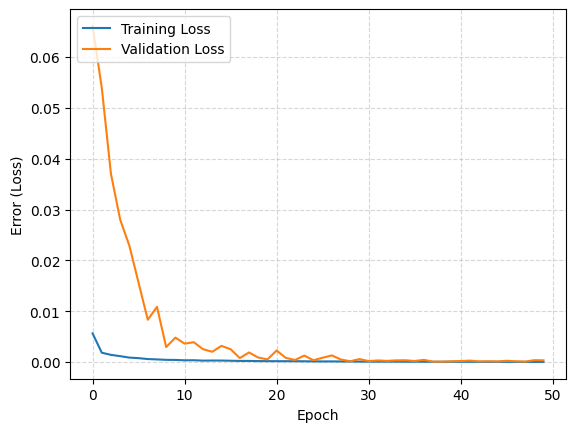

In [19]:
plt.plot(history_baseline_AAPL.history['loss'], label ='Training Loss')
plt.plot(history_baseline_AAPL.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

### Evaluation on AAPL

In [20]:
y_train_predicted_AAPL = baseline_model.predict(x_train_AAPL)
y_test_predicted_AAPL = baseline_model.predict(x_test_AAPL)

31/31 [==============================] - 0s 5ms/step


In [21]:
import math
from sklearn.metrics import mean_squared_error

def return_rmse(test,predicted,name):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
print("Evalution of AAPL with Training Set")
print(evaluate_preds(mm.inverse_transform(y_train_AAPL),mm.inverse_transform(y_train_predicted_AAPL)))

print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(mm.inverse_transform(y_test_AAPL),mm.inverse_transform(y_test_predicted_AAPL)))

Evalution of AAPL with Training Set
{'mae': 0.56659293, 'mse': 0.33745164, 'rmse': 0.56835467, 'mape': 25.803976, 'mase': 27.504341}
Evaluation of AAPL with Testing Set
{'mae': 1.7092134, 'mse': 3.8922646, 'rmse': 1.7640481, 'mape': 5.2150707, 'mase': 4.4662013}


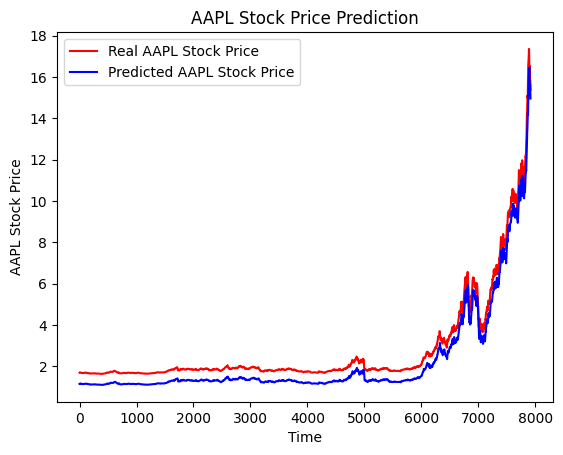

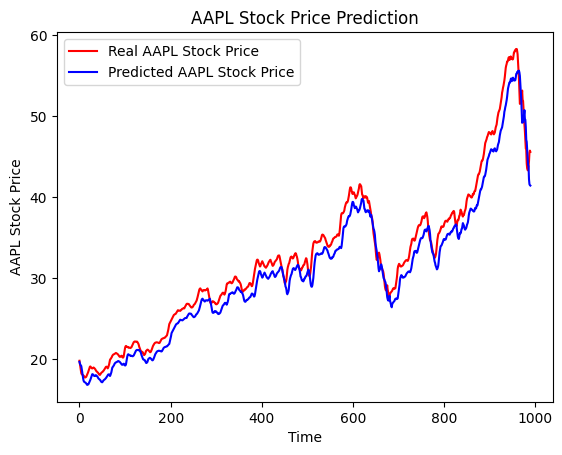

In [24]:
def plot_predictions(test,predicted,symbol):
    test_avg = np.mean(test,axis=1)
    predicted_avg = np.mean(predicted, axis=1)
    plt.plot(test_avg, color='red',label=f'Real {symbol} Stock Price')
    plt.plot(predicted_avg, color='blue',label=f'Predicted {symbol} Stock Price')
    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{symbol} Stock Price')
    plt.legend()
    plt.show()

plot_predictions(mm.inverse_transform(y_train_AAPL),mm.inverse_transform(y_train_predicted_AAPL),"AAPL")
plot_predictions(mm.inverse_transform(y_test_AAPL),mm.inverse_transform(y_test_predicted_AAPL),"AAPL")

Masih terjadi overfitting pada dataframe AAPL, dimana evaluasi pada training set masih bernilai lebih buruk daripada Testing Set.

MAPE pada Testing Set masih bernilai lebih rendah daripada Training Set, begitu juga RMSE dan MAE. Menandakan bahwa error rate pada Training Set masih bernilai cukup tinggi

Pada plot predictions vs test juga terlihat bahwa masih terjadi pergetaran/mispredicted terhadap data predictions

## AMD

In [25]:
history_baseline_AMD = baseline_model.fit(
    x_train_AMD,
    y_train_AMD,
    epochs=50,
    batch_size=32,
    validation_data=(x_valid_AMD,y_valid_AMD)
)

Epoch 1/50
253/253 [==============================] - 5s 21ms/step - loss: 7.2809e-04 - val_loss: 7.7751e-05
Epoch 2/50
253/253 [==============================] - 4s 17ms/step - loss: 6.6441e-04 - val_loss: 7.1582e-05
Epoch 3/50
253/253 [==============================] - 5s 18ms/step - loss: 6.1981e-04 - val_loss: 2.2553e-04
Epoch 4/50
253/253 [==============================] - 6s 23ms/step - loss: 6.0509e-04 - val_loss: 2.5192e-04
Epoch 5/50
253/253 [==============================] - 9s 37ms/step - loss: 5.6128e-04 - val_loss: 3.2034e-05
Epoch 6/50
253/253 [==============================] - 9s 36ms/step - loss: 5.6108e-04 - val_loss: 5.8565e-05
Epoch 7/50
253/253 [==============================] - 10s 39ms/step - loss: 5.4177e-04 - val_loss: 3.3980e-05
Epoch 8/50
253/253 [==============================] - 4s 16ms/step - loss: 5.3283e-04 - val_loss: 2.8707e-05
Epoch 9/50
253/253 [==============================] - 5s 18ms/step - loss: 5.2799e-04 - val_loss: 1.4926e-05
Epoch 10/50
253/25

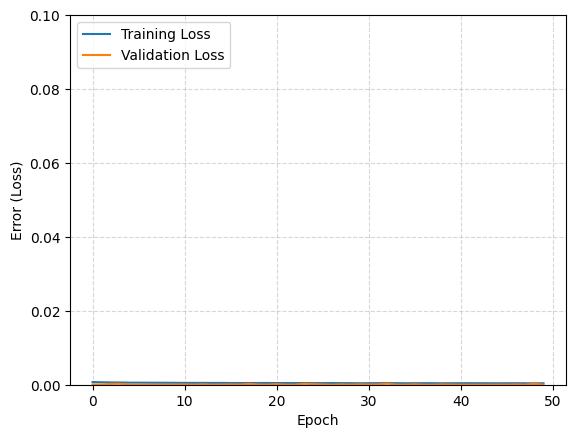

In [45]:
plt.plot(history_baseline_AMD.history['loss'], label ='Training Loss')
plt.plot(history_baseline_AMD.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.ylim([0,0.1])
plt.grid(True, linestyle='--', alpha=0.5)

### Evaluation on AMD

In [26]:
y_train_predicted_AMD = baseline_model.predict(x_train_AMD)
y_test_predicted_AMD = baseline_model.predict(x_test_AMD)

32/32 [==============================] - 0s 5ms/step


In [50]:
print("Evalution of AMD with Training Set")
print(evaluate_preds(mm.inverse_transform(y_train_AMD),mm.inverse_transform(y_train_predicted_AMD)))

print("Evaluation of AMD with Testing Set")
print(evaluate_preds(mm.inverse_transform(y_test_AMD),mm.inverse_transform(y_test_predicted_AMD)))

Evalution of AMD with Training Set
{'mae': 0.5851504, 'mse': 0.873238, 'rmse': 0.6518678, 'mape': 5.8009744, 'mase': 1.9581873}
Evaluation of AMD with Testing Set
{'mae': 0.9249122, 'mse': 2.224667, 'rmse': 1.0402213, 'mape': 5.080965, 'mase': 1.8253871}


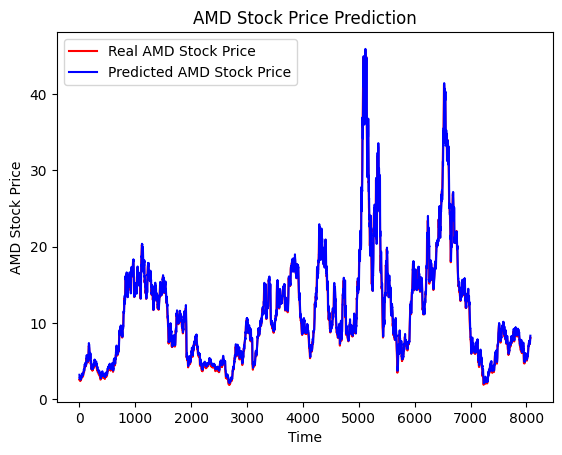

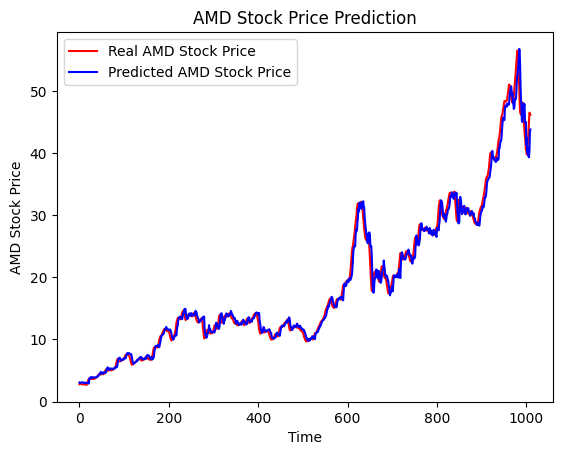

In [69]:
plot_predictions(mm.inverse_transform(y_train_AMD),mm.inverse_transform(y_train_predicted_AMD),"AMD")
plot_predictions(mm.inverse_transform(y_test_AMD),mm.inverse_transform(y_test_predicted_AMD),"AMD")

# Conclusion on Base Model

Terlihat bahwa base model masih tidak dapat menangkap dengan baik prediksi dari kedua saham, dimana bahkan pada saham AAPL, persentase error rata-rata pada training set mencapai 25%, walaupun pada testing set hanya 5%. Hal ini merupakan hasil yang tidak cukup baik dalam sebuah pemodelan.

Pada saham AMD, terlihat bahwa sebenarnya model transformer baseline sudah cukup baik dalam memprediksi harga saham AMD, namun sepertinay persentase error masih dapat diturunkan lagi. Sebab, persentase error masih berkisar pada 5%, sedangkan pada model baseline LSTM sebelumnya, persentase error hanya berkisar 2%an.

# Case C

Hal pertama yang dapat dimodifikasi adalah Menghilangkan positional encoding, sebab dari beberapa website dan repository yang saya dapatkan, Positonal encoding dapat menjadi salah satu penyebab model mengalami performa yang tidak baik. Selain itu, positional encoding kebanyakan digunakan untuk memprediksi atau melakukan pemodelan NLP dimana pengacakan kata memang diperlukan untuk prediksi yang lebih baik.

Hal kedua yang dilakukan adlah menambahkan satu buah layer konvolusional lagi setelah dropout pada transformer_encoder, untuk sedikit mengkomplekskan model untuk mencari nilai optimalnya

## Modified Model 1



In [40]:
def transformer_encoder_modified(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    # "EMBEDDING LAYER"
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    # "ATTENTION LAYER"
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # FEED FORWARD Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model_modified(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):  # This is what stacks our transformer blocks
        x = transformer_encoder_modified(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="linear")(x) #Sesuai dengan horizon
    return keras.Model(inputs, outputs)

In [74]:
input_shape = AAPL_x.shape[1:]

tf.keras.backend.clear_session()

modified_model = build_model_modified(
    input_shape,
    head_size=46, # Embedding size for attention
    num_heads=60, # Number of attention heads
    ff_dim=55, # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

modified_model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
)
modified_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 5, 1)        2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 5, 1)        19321       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

### AAPL

In [75]:
history_modified_AAPL = modified_model.fit(
    x_train_AAPL,
    y_train_AAPL,
    epochs=50,
    batch_size=32,
    validation_data=(x_valid_AAPL,y_valid_AAPL)
)

Epoch 1/50
248/248 [==============================] - 10s 23ms/step - loss: 7.3045e-04 - val_loss: 0.0090
Epoch 2/50
248/248 [==============================] - 4s 16ms/step - loss: 1.4688e-04 - val_loss: 0.0026
Epoch 3/50
248/248 [==============================] - 6s 23ms/step - loss: 9.3605e-05 - val_loss: 8.4348e-04
Epoch 4/50
248/248 [==============================] - 4s 17ms/step - loss: 7.7918e-05 - val_loss: 3.6049e-04
Epoch 5/50
248/248 [==============================] - 4s 17ms/step - loss: 6.5613e-05 - val_loss: 2.4805e-04
Epoch 6/50
248/248 [==============================] - 5s 20ms/step - loss: 5.9446e-05 - val_loss: 1.8952e-04
Epoch 7/50
248/248 [==============================] - 4s 16ms/step - loss: 5.1136e-05 - val_loss: 1.3445e-04
Epoch 8/50
248/248 [==============================] - 4s 16ms/step - loss: 5.3591e-05 - val_loss: 1.0655e-04
Epoch 9/50
248/248 [==============================] - 5s 19ms/step - loss: 5.2390e-05 - val_loss: 1.3138e-04
Epoch 10/50
248/248 [=====

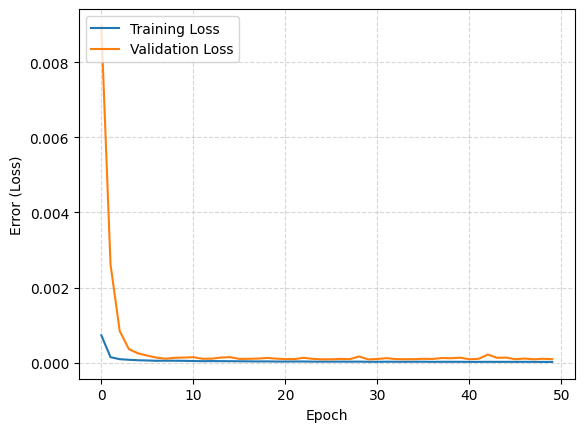

In [110]:
plt.plot(history_modified_AAPL.history['loss'], label ='Training Loss')
plt.plot(history_modified_AAPL.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

#### Evaluation on AAPL

In [77]:
y_train_predicted_AAPL_modified = modified_model.predict(x_train_AAPL)
y_test_predicted_AAPL_modified = modified_model.predict(x_test_AAPL)

31/31 [==============================] - 0s 4ms/step


In [78]:
print("Evalution of AAPL with Training Set")
print(evaluate_preds(mm.inverse_transform(y_train_AAPL),mm.inverse_transform(y_train_predicted_AAPL_modified)))

print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(mm.inverse_transform(y_test_AAPL),mm.inverse_transform(y_test_predicted_AAPL_modified)))

Evalution of AAPL with Training Set
{'mae': 0.05268227, 'mse': 0.012534981, 'rmse': 0.057294834, 'mape': 1.4780065, 'mase': 2.557376}
Evaluation of AAPL with Testing Set
{'mae': 1.3696474, 'mse': 3.5756598, 'rmse': 1.5798686, 'mape': 3.9090905, 'mase': 3.5789104}


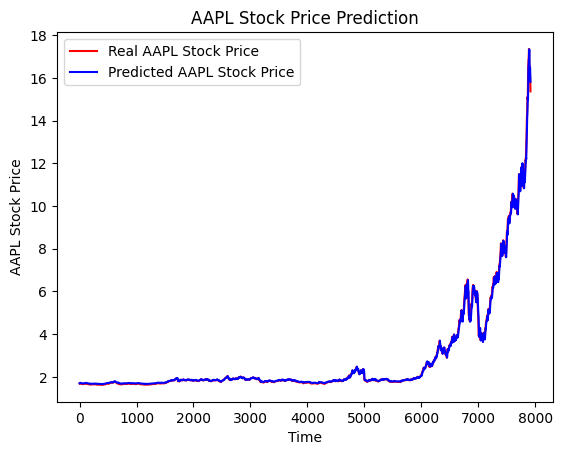

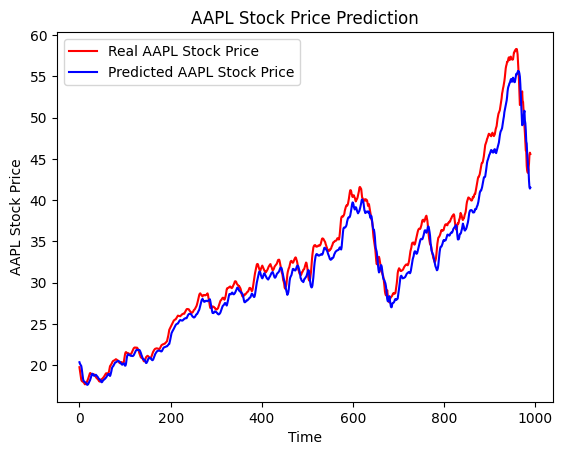

In [79]:
plot_predictions(mm.inverse_transform(y_train_AAPL),mm.inverse_transform(y_train_predicted_AAPL_modified),"AAPL")
plot_predictions(mm.inverse_transform(y_test_AAPL),mm.inverse_transform(y_test_predicted_AAPL_modified),"AAPL")

### AMD

In [80]:
history_modified_AMD = modified_model.fit(
    x_train_AMD,
    y_train_AMD,
    epochs=50,
    batch_size=32,
    validation_data=(x_valid_AMD,y_valid_AMD)
)

Epoch 1/50
253/253 [==============================] - 4s 17ms/step - loss: 6.9074e-04 - val_loss: 3.9916e-05
Epoch 2/50
253/253 [==============================] - 5s 19ms/step - loss: 6.1494e-04 - val_loss: 2.5492e-05
Epoch 3/50
253/253 [==============================] - 4s 16ms/step - loss: 5.5471e-04 - val_loss: 1.8315e-05
Epoch 4/50
253/253 [==============================] - 4s 16ms/step - loss: 5.4532e-04 - val_loss: 3.8390e-05
Epoch 5/50
253/253 [==============================] - 5s 19ms/step - loss: 5.4216e-04 - val_loss: 3.0835e-05
Epoch 6/50
253/253 [==============================] - 4s 16ms/step - loss: 5.2604e-04 - val_loss: 1.5884e-05
Epoch 7/50
253/253 [==============================] - 4s 16ms/step - loss: 5.0569e-04 - val_loss: 1.5147e-05
Epoch 8/50
253/253 [==============================] - 5s 19ms/step - loss: 5.1013e-04 - val_loss: 1.9980e-05
Epoch 9/50
253/253 [==============================] - 4s 16ms/step - loss: 4.9848e-04 - val_loss: 2.4607e-05
Epoch 10/50
253/253

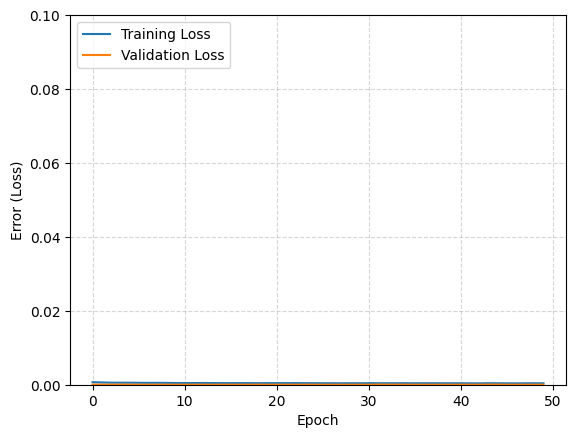

In [81]:
plt.plot(history_modified_AMD.history['loss'], label ='Training Loss')
plt.plot(history_modified_AMD.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.ylim([0,0.1])
plt.grid(True, linestyle='--', alpha=0.5)

#### Evaluation on AMD

In [82]:
y_train_predicted_AMD_modified = modified_model.predict(x_train_AMD)
y_test_predicted_AMD_modified = modified_model.predict(x_test_AMD)

32/32 [==============================] - 0s 5ms/step


In [83]:
print("Evalution of AMD with Training Set")
print(evaluate_preds(mm.inverse_transform(y_train_AMD),mm.inverse_transform(y_train_predicted_AMD_modified)))

print("Evaluation of AMD with Testing Set")
print(evaluate_preds(mm.inverse_transform(y_test_AMD),mm.inverse_transform(y_test_predicted_AMD_modified)))

Evalution of AMD with Training Set
{'mae': 0.5432243, 'mse': 0.85487694, 'rmse': 0.611712, 'mape': 4.884403, 'mase': 1.817883}
Evaluation of AMD with Testing Set
{'mae': 0.9996888, 'mse': 2.5694592, 'rmse': 1.1207087, 'mape': 5.0846257, 'mase': 1.9729642}


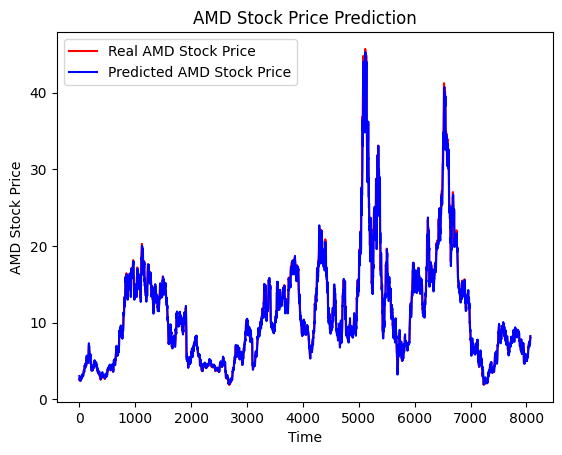

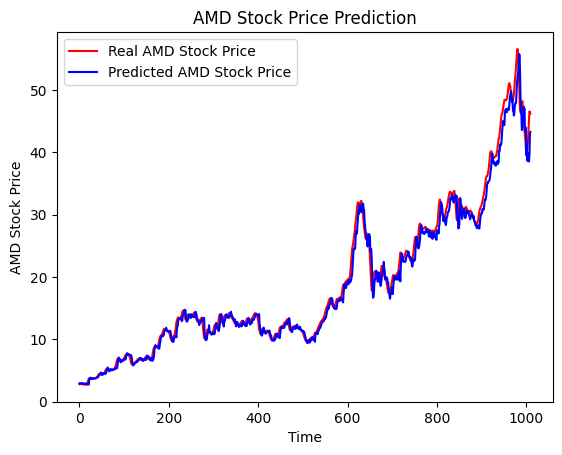

In [84]:
plot_predictions(mm.inverse_transform(y_train_AMD),mm.inverse_transform(y_train_predicted_AMD_modified),"AMD")
plot_predictions(mm.inverse_transform(y_test_AMD),mm.inverse_transform(y_test_predicted_AMD_modified),"AMD")

### Conclusion on Modified Model 1

Terlihat bahwa setelah membuang Positional encoding, model menjadi jauh lebih baik dalam memprediksi training maupun testing set, hal ini dikarenakan keberadaan positional encoding yang dirasa kurang perlu dalam memprediksi harga saham yang tidak perlu diubah ubah posisinya

Dampak perubahan evaluasi pada AAPL sangat terasa ,dimana mape pada training set menurun drastis hingga 1% dan testing set menjadi 3%. Namun, pada AMD penurunan mape dan error rate lainnya masih tergolong cukup kecil

Selain itu, penambahan conv1D layer juga terbukti berpengaruh baik terhadap keseluruhan model dalam memprediksi harga saham

## Modified Model 2 => Final Model

Model modifikasi kedua akan dilakukan dengan memodifikasi model modified 1. Pada modifikasi kedua, saya akan menambahkan sebuah dropout setelah penambahan conv1D layer sebelumnya. Hal ini diupayakan untuk mengurangi overfitting pada validation set untuk kedua harga saham. Selain itu, kita juga mengganti activation function dari elu menjadi relu pada setiap mlp_unit

In [85]:
def transformer_encoder_modified2(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    # "EMBEDDING LAYER"
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    # "ATTENTION LAYER"
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # FEED FORWARD Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.Dropout(dropout)(x)
    return x + res

def build_model_modified2(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):  # This is what stacks our transformer blocks
        x = transformer_encoder_modified(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="linear")(x) #Sesuai dengan horizon
    return keras.Model(inputs, outputs)

In [86]:
input_shape = AAPL_x.shape[1:]

tf.keras.backend.clear_session()

modified_model2 = build_model_modified2(
    input_shape,
    head_size=55, # Embedding size for attention
    num_heads=60, # Number of attention heads
    ff_dim=55, # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=10,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

modified_model2.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
)
modified_model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 5, 1)        2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 5, 1)        23101       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

### AAPL

In [87]:
history_modified2_AAPL = modified_model2.fit(
    x_train_AAPL,
    y_train_AAPL,
    epochs=50,
    batch_size=32,
    validation_data=(x_valid_AAPL,y_valid_AAPL)
)

Epoch 1/50
248/248 [==============================] - 19s 37ms/step - loss: 9.0322e-04 - val_loss: 0.0122
Epoch 2/50
248/248 [==============================] - 7s 30ms/step - loss: 1.5879e-04 - val_loss: 0.0029
Epoch 3/50
248/248 [==============================] - 8s 34ms/step - loss: 9.9353e-05 - val_loss: 8.6389e-04
Epoch 4/50
248/248 [==============================] - 8s 33ms/step - loss: 8.0356e-05 - val_loss: 2.9153e-04
Epoch 5/50
248/248 [==============================] - 7s 30ms/step - loss: 6.8324e-05 - val_loss: 2.0682e-04
Epoch 6/50
248/248 [==============================] - 8s 33ms/step - loss: 6.9398e-05 - val_loss: 2.1904e-04
Epoch 7/50
248/248 [==============================] - 8s 33ms/step - loss: 5.9206e-05 - val_loss: 3.0632e-04
Epoch 8/50
248/248 [==============================] - 7s 30ms/step - loss: 5.2943e-05 - val_loss: 1.9776e-04
Epoch 9/50
248/248 [==============================] - 9s 38ms/step - loss: 5.1405e-05 - val_loss: 1.3975e-04
Epoch 10/50
248/248 [=====

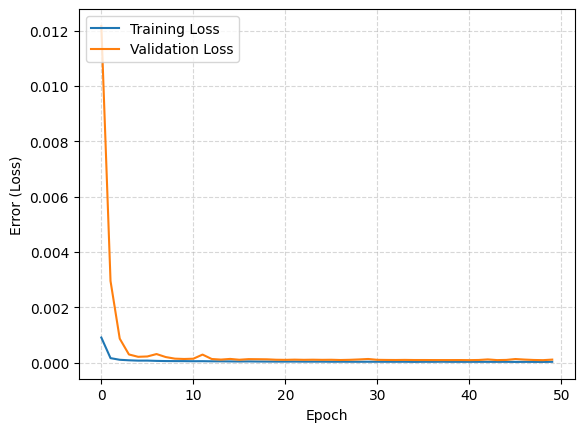

In [89]:
plt.plot(history_modified2_AAPL.history['loss'], label ='Training Loss')
plt.plot(history_modified2_AAPL.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

#### Evaluation on AAPL

In [90]:
y_train_predicted_AAPL_modified2 = modified_model2.predict(x_train_AAPL)
y_test_predicted_AAPL_modified2 = modified_model2.predict(x_test_AAPL)

31/31 [==============================] - 0s 13ms/step


In [92]:
print("Evalution of AAPL with Training Set")
print(evaluate_preds(mm.inverse_transform(y_train_AAPL),mm.inverse_transform(y_train_predicted_AAPL_modified2)))

print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(mm.inverse_transform(y_test_AAPL),mm.inverse_transform(y_test_predicted_AAPL_modified2)))

Evalution of AAPL with Training Set
{'mae': 0.054970477, 'mse': 0.01377683, 'rmse': 0.059994552, 'mape': 1.5409976, 'mase': 2.6684537}
Evaluation of AAPL with Testing Set
{'mae': 1.0416294, 'mse': 2.138972, 'rmse': 1.1948751, 'mape': 3.0080276, 'mase': 2.7217946}


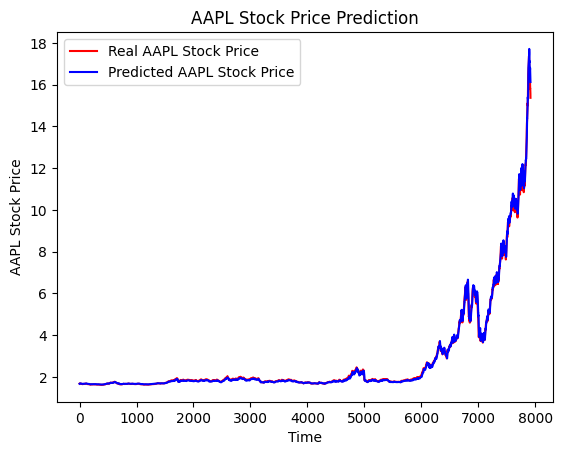

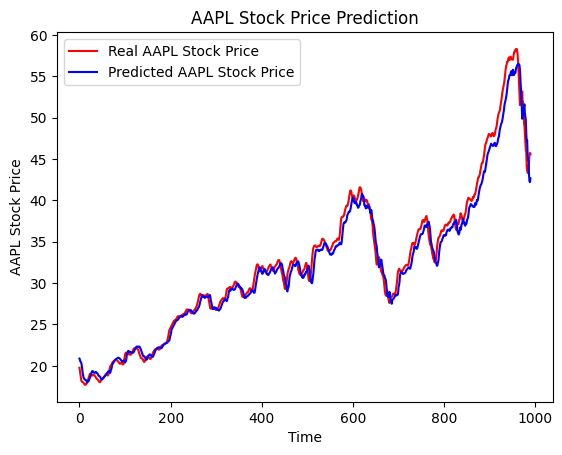

In [94]:
plot_predictions(mm.inverse_transform(y_train_AAPL),mm.inverse_transform(y_train_predicted_AAPL_modified2),"AAPL")
plot_predictions(mm.inverse_transform(y_test_AAPL),mm.inverse_transform(y_test_predicted_AAPL_modified2),"AAPL")

### AMD

In [95]:
history_modified2_AMD = modified_model2.fit(
    x_train_AMD,
    y_train_AMD,
    epochs=50,
    batch_size=32,
    validation_data=(x_valid_AMD,y_valid_AMD)
)

Epoch 1/50
253/253 [==============================] - 9s 36ms/step - loss: 6.9821e-04 - val_loss: 3.6662e-05
Epoch 2/50
253/253 [==============================] - 8s 33ms/step - loss: 6.4285e-04 - val_loss: 1.6176e-05
Epoch 3/50
253/253 [==============================] - 7s 29ms/step - loss: 6.0441e-04 - val_loss: 2.4875e-05
Epoch 4/50
253/253 [==============================] - 8s 32ms/step - loss: 6.1057e-04 - val_loss: 4.1861e-05
Epoch 5/50
253/253 [==============================] - 8s 32ms/step - loss: 5.8644e-04 - val_loss: 1.5975e-05
Epoch 6/50
253/253 [==============================] - 7s 29ms/step - loss: 5.4461e-04 - val_loss: 2.1671e-05
Epoch 7/50
253/253 [==============================] - 9s 36ms/step - loss: 5.3904e-04 - val_loss: 2.2732e-05
Epoch 8/50
253/253 [==============================] - 9s 36ms/step - loss: 5.0082e-04 - val_loss: 5.5134e-05
Epoch 9/50
253/253 [==============================] - 9s 37ms/step - loss: 5.0158e-04 - val_loss: 1.6825e-05
Epoch 10/50
253/253

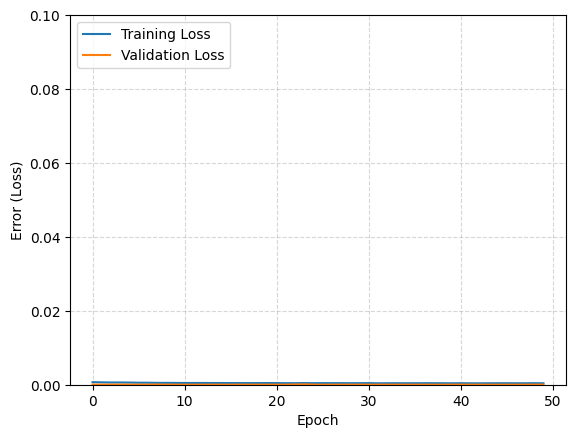

In [96]:
plt.plot(history_modified2_AMD.history['loss'], label ='Training Loss')
plt.plot(history_modified2_AMD.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.ylim([0,0.1])
plt.grid(True, linestyle='--', alpha=0.5)

#### Evaluation on AMD

In [97]:
y_train_predicted_AMD_modified2 = modified_model2.predict(x_train_AMD)
y_test_predicted_AMD_modified2 = modified_model2.predict(x_test_AMD)

32/32 [==============================] - 0s 7ms/step


In [98]:
print("Evalution of AMD with Training Set")
print(evaluate_preds(mm.inverse_transform(y_train_AMD),mm.inverse_transform(y_train_predicted_AMD_modified2)))

print("Evaluation of AMD with Testing Set")
print(evaluate_preds(mm.inverse_transform(y_test_AMD),mm.inverse_transform(y_test_predicted_AMD_modified2)))

Evalution of AMD with Training Set
{'mae': 0.56052154, 'mse': 0.83776075, 'rmse': 0.6281023, 'mape': 5.3587503, 'mase': 1.8757677}
Evaluation of AMD with Testing Set
{'mae': 0.90506643, 'mse': 2.174062, 'rmse': 1.0256224, 'mape': 4.9080076, 'mase': 1.7862197}


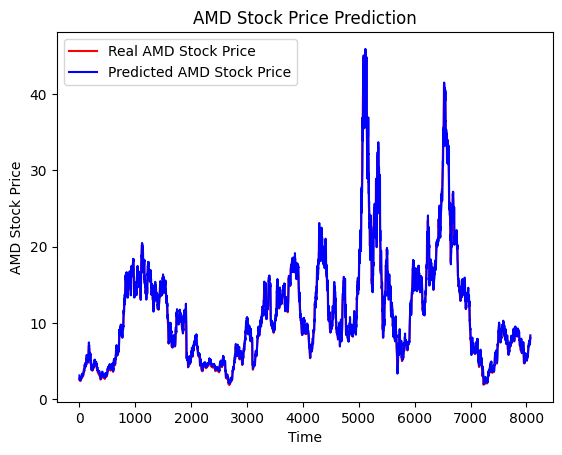

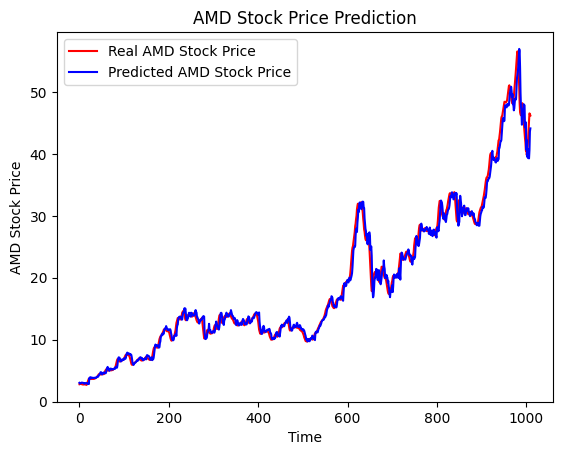

In [99]:
plot_predictions(mm.inverse_transform(y_train_AMD),mm.inverse_transform(y_train_predicted_AMD_modified2),"AMD")
plot_predictions(mm.inverse_transform(y_test_AMD),mm.inverse_transform(y_test_predicted_AMD_modified2),"AMD")

### Conclusion on Modified Model 2

Terlihat bahwa model modified 2 sudah jauh lebih stabil, dimana semua error rate hasil evaluasi kedua saham sudah menurun dengan cukup signifikan.

Penambahan dropout layer untuk regularisasi model terbukti menghasilkan nilai yang cukup signifikan pada pemodelan. Selain itu, ternyata perubahan activation function layer pada mlp dari elu menjadi relu dapat meningkatkan performa model.

Hal ini dikarenakan relu merupakan sebuah activation function yang lebih tidak kompleks dan
Sayangnya, setelah berbagai upaya yang dilakukan, hasil model transformer tetap tidak dapat menandingi hasil model LSTM/BiLSTM pada soal no 1

# Case D

Menggunakan Final Model, yaitu modified model 2, kita akan memprediksi testing set dan mengevaluasinya dengan 5 metriks, yaitu rmse,mse,mae,mape, dan mase

## AAPL

In [100]:
y_test_predicted_AAPL_final = modified_model2.predict(x_test_AAPL)

31/31 [==============================] - 0s 15ms/step


In [103]:
print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(mm.inverse_transform(y_test_AAPL),mm.inverse_transform(y_test_predicted_AAPL_final)))

Evaluation of AAPL with Testing Set
{'mae': 0.7241162, 'mse': 1.1566567, 'rmse': 0.8228294, 'mape': 2.1123047, 'mase': 1.8921272}


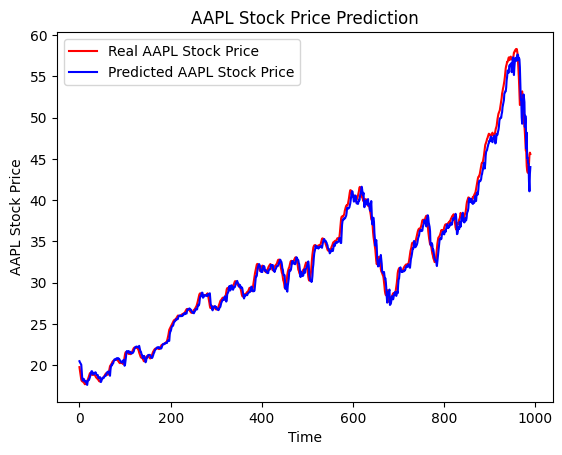

In [106]:
plot_predictions(mm.inverse_transform(y_test_AAPL),mm.inverse_transform(y_test_predicted_AAPL_final),"AAPL")

## AMD

In [107]:
y_test_predicted_AMD_final = modified_model2.predict(x_test_AMD)

32/32 [==============================] - 0s 14ms/step


In [108]:
print("Evaluation of AMD with Testing Set")
print(evaluate_preds(mm.inverse_transform(y_test_AMD),mm.inverse_transform(y_test_predicted_AMD_final)))

Evaluation of AMD with Testing Set
{'mae': 0.90506643, 'mse': 2.174062, 'rmse': 1.0256224, 'mape': 4.9080076, 'mase': 1.7862197}


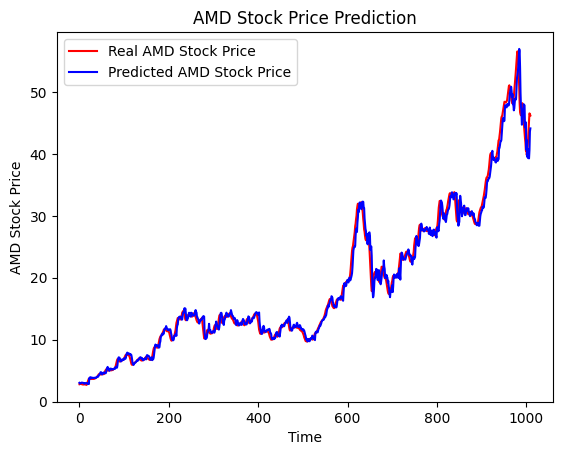

In [109]:
plot_predictions(mm.inverse_transform(y_test_AMD),mm.inverse_transform(y_test_predicted_AMD_final),"AMD")

## Conclusion on Final Evaluation

Pada final predictions AAPL, hasil evaluasi yang didapatkan sudah cukup baik, dimana semua hasil error rata-rata (mape) hanya 3% , serta error selisih rata-rata kuadrat bernilai (mse) 1.15 dan akar kuadratnya bernilai 0.82(rmse).
Hasil selisih mutlak juga hanya bernilai 0.724 dan mase bernilai 1.89

Pada final predictions AMD, hasil evaluasi yang didapatkan sudah cukup baik, dimana semua hasil error rata-rata (mape) hanya 4.9% , serta error selisih rata-rata kuadrat bernilai (mse) 2.17 dan akar kuadratnya bernilai 1.02(rmse).
Hasil selisih mutlak juga hanya bernilai 0.90 dan mase bernilai 1.78

Terlihat bahwa semua hasil metrik sudah memuaskan dan model dapat dikatakan layak, sebab semua metrik menunjukkan hasil cukup baik

# Final Conclusion

- Dapat dikatakan bahwa model baseline dari transformer masih tidak dapat memprediksi harga saham keduanya secara cukup. Hal ini dapat dilihat dari nilai mape yang cukup tinggi antara ground truth dan predicted truth

- Setelah melakukan berbagai modifikasi, yaitu pembuangan positional encoding, penambahan layer dropout, serta penggantian activation function, pemodelan transformer menjadi jauh lebih baik ketimbang baseline, dimana kali ini sudah dapat memprediksi harga saham keduanya dengan cukup baik.

- Namun, setelah dilakukan berbagai percobaan, pemodelan transformer tetap tidak dapat menandingi performa dari LSTM/BiLSTM. Setelah dicari tahu, dapat disimpulkan bahwa Transformer merupakan sebuah algoritma Deep RNN yang lebih berpusat dan digunakan untuk kasus NLP(Natural Language Processing). Sedangkan, LSTM adalah sebuah algoritma RNN yang lebih banyak digunakan dan cocok untuk time-series prediction, yaitu contohnya adalah prediksi harga saham